## Experiments with types of visualizations on LENA data


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import random
import datetime
import numpy as np
from datetime import timedelta
import os as os
from pytz import timezone

In [ ]:
childid = '032LTP2'
filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
man_timestamps_main = pd.read_csv(filepath_of_csv)


In [ ]:
man_timestamps_main['words_per_sec'] = man_timestamps_main['wordCount']/man_timestamps_main['duration']

In [ ]:
man_timestamps_main['words_per_sec'] 

0       4.801325
1       5.854701
2       7.435644
3       5.126316
4       7.198020
          ...   
1512    2.084906
1513    4.850877
1514    3.857143
1515    3.504348
1516    4.038835
Name: words_per_sec, Length: 1517, dtype: float64

In [ ]:
man_timestamps_main 

,Unnamed: 0,seg_id,clip_onset,clip_offset,duration,avg_dB,peak_dB,wordCount,nonSpeechDur,uttCnt,uttLength,file_name,seconds,child_id,segment_type,random_idx,words_per_sec
0,0,1,16.88,18.39,1.51,-34.80,-25.78,7.25,P0.00S,0,P0.00S,16_18_MAN_032LTP2.wav,60.0,032LTP2,MAN,927,4.801325
1,1,2,54.35,55.52,1.17,-40.89,-32.53,6.85,P0.00S,0,P0.00S,54_55_MAN_032LTP2.wav,60.0,032LTP2,MAN,1488,5.854701
2,2,3,170.29,171.30,1.01,-38.02,-30.02,7.51,P0.00S,0,P0.00S,170_171_MAN_032LTP2.wav,180.0,032LTP2,MAN,112,7.435644
3,3,4,192.76,194.66,1.90,-30.27,-22.73,9.74,P0.00S,0,P0.00S,192_194_MAN_032LTP2.wav,240.0,032LTP2,MAN,222,5.126316
4,4,5,198.09,199.10,1.01,-29.02,-20.63,7.27,P0.00S,0,P0.00S,198_199_MAN_032LTP2.wav,240.0,032LTP2,MAN,686,7.198020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1512,1513,45309.36,45310.42,1.06,-34.16,-27.06,2.21,P0.00S,0,P0.00S,45309_45310_MAN_032LTP2.wav,45360.0,032LTP2,MAN,1175,2.084906
1513,1513,1514,45326.16,45327.30,1.14,-33.43,-28.35,5.53,P0.00S,0,P0.00S,45326_45327_MAN_032LTP2.wav,45360.0,032LTP2,MAN,433,4.850877
1514,1514,1515,46246.22,46247.48,1.26,-40.36,-32.40,4.86,P0.00S,0,P0.00S,46246_46247_MAN_032LTP2.wav,46260.0,032LTP2,MAN,1472,3.857143
1515,1515,1516,46790.98,46793.28,2.30,-36.41,-27.64,8.06,P0.00S,0,P0.00S,46790_46793_MAN_032LTP2.wav,46800.0,032LTP2,MAN,1292,3.504348


Alternate strategy: Aggregate the whole df into 20 bins (in chronological order) and then take talking speed

In [ ]:
man_timestamps1 = man_timestamps_main
man_timestamps1['value_bin']=pd.cut(man_timestamps_main['clip_offset'], 20, labels=[x for x in range(1,21)])
man_timestamps1['freq_bin']=pd.qcut(man_timestamps_main['clip_offset'], 20, labels=[x for x in range(1,21)])  

In [ ]:
vbin_df = man_timestamps1.groupby('value_bin').agg('sum')
fbin_df = man_timestamps1.groupby('freq_bin').agg('sum')
vbin_df['wps'] = vbin_df['wordCount']/vbin_df['duration']
fbin_df['wps'] = fbin_df['wordCount']/fbin_df['duration']

In [ ]:
vbin_df

,Unnamed: 0,seg_id,clip_onset,clip_offset,duration,avg_dB,peak_dB,wordCount,uttCnt,seconds,random_idx,words_per_sec,wps
value_bin,,,,,,,,,,,,,
1,703,741,59176.71,59227.59,50.88,-1260.77,-939.51,244.61,0,60360.0,26617,186.547506,4.807586
2,893,912,61640.68,61664.93,24.25,-622.79,-458.21,100.88,0,62160.0,15790,79.216842,4.160000
3,13110,13225,737787.43,737976.59,189.16,-3851.75,-2789.62,776.58,0,741420.0,88610,499.182649,4.105413
4,29845,29972,1073965.92,1074153.93,188.01,-3518.53,-2474.39,780.92,0,1078020.0,93601,546.625125,4.153609
5,27080,27160,881309.09,881431.68,122.59,-2154.64,-1526.68,485.23,0,883740.0,62911,312.633651,3.958153
6,86010,86193,2359213.46,2359504.49,291.03,-5058.00,-3552.07,1187.64,0,2364900.0,139358,757.986551,4.080816
7,126994,127187,3052709.31,3053009.55,300.24,-5331.44,-3699.51,1196.90,0,3058800.0,142670,779.135098,3.986477
8,116325,116466,2478866.35,2479058.70,192.35,-4329.29,-3063.08,759.98,0,2483460.0,101191,567.046234,3.951027
9,6293,6300,137109.84,137118.83,8.99,-227.35,-158.76,36.24,0,137280.0,7380,28.578216,4.031146


In [ ]:
man_vbin_offset_df = man_timestamps1.groupby('value_bin').agg({'duration': 'sum', 'wordCount': 'sum', 'clip_offset':'max'})
man_vbin_offset_df['hourly_offset'] = man_vbin_offset_df['clip_offset']/3600
man_vbin_offset_df['avg_speed_recorded'] = man_vbin_offset_df['wordCount']/man_vbin_offset_df['duration']

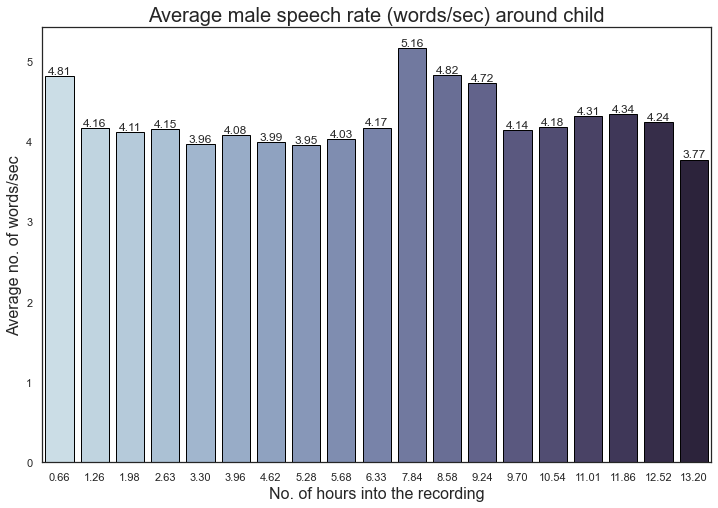

In [ ]:
man_vbin_offset_df.dropna(inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt
truncated_x = ['{:.2f}'.format(t) for t in man_vbin_offset_df['hourly_offset']]
truncated_y = [round(t,2) for t in man_vbin_offset_df['avg_speed_recorded']]
ax = sns.barplot(x = man_vbin_offset_df['hourly_offset'], y = truncated_y, palette = "ch:s=.25,rot=-.25",edgecolor='black')
ax.bar_label(ax.containers[0], fontsize=12)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style='white')
plt.xticks(rotation=0)
ax.set_xticklabels(truncated_x)
plt.xlabel('No. of hours into the recording', fontsize=16)
plt.ylabel('Average no. of words/sec', fontsize=16)
plt.title("Average male speech rate (words/sec) around child", fontsize=20)
plt.show()

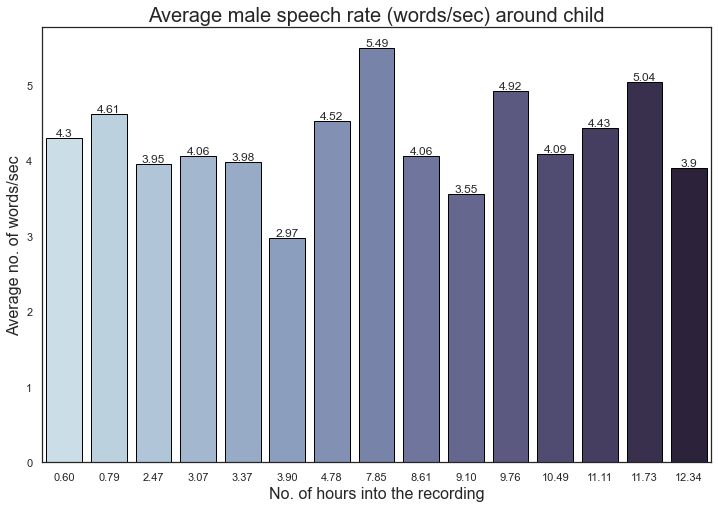

In [ ]:
# Refactoring code into function -- change variables when integrating into script

import seaborn as sns
import matplotlib.pyplot as plt

def create_MAN_speed_graph(childid):
    filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
    man_timestamps_main = pd.read_csv(filepath_of_csv)
    man_timestamps1 = man_timestamps_main
    man_timestamps1['value_bin']=pd.cut(man_timestamps_main['clip_offset'], 20, labels=[x for x in range(1,21)])
    man_timestamps1['freq_bin']=pd.qcut(man_timestamps_main['clip_offset'], 20, labels=[x for x in range(1,21)])

    '''
    vbin_df = man_timestamps1.groupby('value_bin').agg('sum')
    fbin_df = man_timestamps1.groupby('freq_bin').agg('sum')
    vbin_df['wps'] = vbin_df['wordCount']/vbin_df['duration']
    fbin_df['wps'] = fbin_df['wordCount']/fbin_df['duration']
    '''

    man_vbin_offset_df = man_timestamps1.groupby('value_bin').agg({'duration': 'sum', 'wordCount': 'sum', 'clip_offset':'max'})
    man_vbin_offset_df['hourly_offset'] = man_vbin_offset_df['clip_offset']/3600
    man_vbin_offset_df['avg_speed_recorded'] = man_vbin_offset_df['wordCount']/man_vbin_offset_df['duration']

    man_vbin_offset_df.dropna(inplace=True)

    truncated_x = ['{:.2f}'.format(t) for t in man_vbin_offset_df['hourly_offset']]
    truncated_y = [round(t,2) for t in man_vbin_offset_df['avg_speed_recorded']]
    ax = sns.barplot(x = man_vbin_offset_df['hourly_offset'], y = truncated_y, palette = "ch:s=.25,rot=-.25",edgecolor='black')
    ax.bar_label(ax.containers[0], fontsize=12)
    sns.set(rc={'figure.figsize':(12,8)})
    sns.set_theme(style='white')
    plt.xticks(rotation=0)
    ax.set_xticklabels(truncated_x)
    plt.xlabel('No. of hours into the recording', fontsize=16)
    plt.ylabel('Average no. of words/sec', fontsize=16)
    plt.title("Average male speech rate (words/sec) around child", fontsize=20)
    plt.show()

create_MAN_speed_graph('001LTP1')

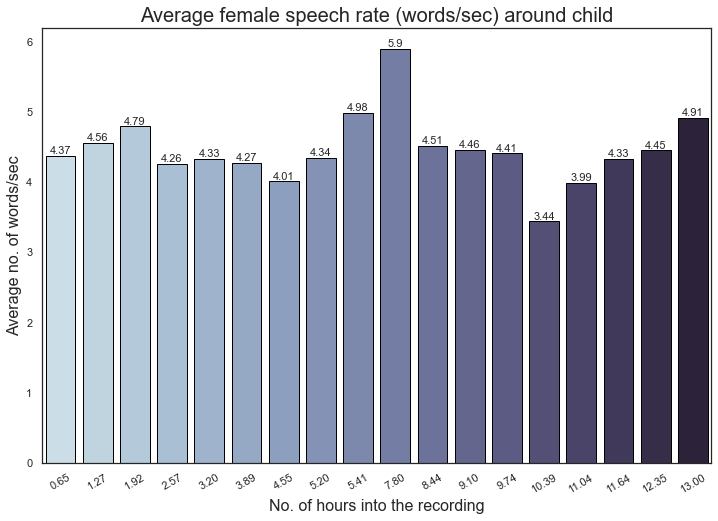

In [ ]:
def create_FAN_speed_graph(id):

        '''
        This function creates a plot of male talking speed by mining MAN timestamps and saves it in the output directory. This has binning done w.r.t. values of offsets.
        '''

        filepath_of_csv = os.path.join( "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles",  id+ "_speech_output",  id+"_FAN_timestamps.csv")
        man_timestamps_main = pd.read_csv(filepath_of_csv)
        man_timestamps1 = man_timestamps_main
        man_timestamps1['value_bin']=pd.cut(man_timestamps_main['clip_offset'], 20, labels=[x for x in range(1,21)])
        man_timestamps1['freq_bin']=pd.qcut(man_timestamps_main['clip_offset'], 20, labels=[x for x in range(1,21)])
        man_vbin_offset_df = man_timestamps1.groupby('value_bin').agg({'duration': 'sum', 'wordCount': 'sum', 'clip_offset':'max'})
        man_vbin_offset_df['hourly_offset'] = man_vbin_offset_df['clip_offset']/3600
        man_vbin_offset_df['avg_speed_recorded'] = man_vbin_offset_df['wordCount']/man_vbin_offset_df['duration']

        man_vbin_offset_df.dropna(inplace=True)

        truncated_x = ['{:.2f}'.format(t) for t in man_vbin_offset_df['hourly_offset']]
        truncated_y = [round(t,2) for t in man_vbin_offset_df['avg_speed_recorded']]
        ax = sns.barplot(x = man_vbin_offset_df['hourly_offset'], y = truncated_y, palette = "ch:s=.25,rot=-.25",edgecolor='black')
        ax.bar_label(ax.containers[0], fontsize=11)
        sns.set(rc={'figure.figsize':(12,8)})
        sns.set_theme(style='white')
        plt.xticks(rotation=30)
        ax.set_xticklabels(truncated_x)
        plt.xlabel('No. of hours into the recording', fontsize=16)
        plt.ylabel('Average no. of words/sec', fontsize=16)
        plt.title("Average female speech rate (words/sec) around child", fontsize=20)
        plt.show()

create_FAN_speed_graph("001LTP1")

Same graphs as above, but with real time

In [7]:
childid = '032LTP2'
filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
man_timestamps_main = pd.read_csv(filepath_of_csv)
man_timestamps_main['words_per_sec'] = man_timestamps_main['wordCount']/man_timestamps_main['duration']

In [59]:
main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
itsinfocsv = pd.read_csv(infocsvpath)
start_datetime_str = str(itsinfocsv['startClockTime'][0])
end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
            actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
            actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

elif (childid.find('R')>=0 or childid.find('J')>=0):
            actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
            actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))
 
start_bucket = actual_time_of_start.hour+1
end_bucket = actual_time_of_end.hour+1
secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
buckets = [i for i in range (start_bucket, end_bucket+1)]
no_of_buckets = len(buckets)
bucket_offsets = [0,secs_until_closest_hour]
for i in range(1, no_of_buckets):
    bucket_offsets.append(secs_until_closest_hour+3600*(i))
        
print(buckets)
print(len(buckets))
print(bucket_offsets) 
print(len(bucket_offsets))

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
17
[0, 595, 4195, 7795, 11395, 14995, 18595, 22195, 25795, 29395, 32995, 36595, 40195, 43795, 47395, 50995, 54595, 58195]
18


In [61]:
man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, 
                                labels=buckets, include_lowest=True, right=True)
man_timestamps_main

,Unnamed: 0,seg_id,clip_onset,clip_offset,duration,avg_dB,peak_dB,wordCount,nonSpeechDur,uttCnt,uttLength,file_name,seconds,child_id,segment_type,random_idx,words_per_sec,which_hour,before_hour_of_day
0,0,1,16.88,18.39,1.51,-34.80,-25.78,7.25,P0.00S,0,P0.00S,16_18_MAN_032LTP2.wav,60.0,032LTP2,MAN,927,4.801325,7,7
1,1,2,54.35,55.52,1.17,-40.89,-32.53,6.85,P0.00S,0,P0.00S,54_55_MAN_032LTP2.wav,60.0,032LTP2,MAN,1488,5.854701,7,7
2,2,3,170.29,171.30,1.01,-38.02,-30.02,7.51,P0.00S,0,P0.00S,170_171_MAN_032LTP2.wav,180.0,032LTP2,MAN,112,7.435644,7,7
3,3,4,192.76,194.66,1.90,-30.27,-22.73,9.74,P0.00S,0,P0.00S,192_194_MAN_032LTP2.wav,240.0,032LTP2,MAN,222,5.126316,7,7
4,4,5,198.09,199.10,1.01,-29.02,-20.63,7.27,P0.00S,0,P0.00S,198_199_MAN_032LTP2.wav,240.0,032LTP2,MAN,686,7.198020,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1512,1513,45309.36,45310.42,1.06,-34.16,-27.06,2.21,P0.00S,0,P0.00S,45309_45310_MAN_032LTP2.wav,45360.0,032LTP2,MAN,1175,2.084906,20,20
1513,1513,1514,45326.16,45327.30,1.14,-33.43,-28.35,5.53,P0.00S,0,P0.00S,45326_45327_MAN_032LTP2.wav,45360.0,032LTP2,MAN,433,4.850877,20,20
1514,1514,1515,46246.22,46247.48,1.26,-40.36,-32.40,4.86,P0.00S,0,P0.00S,46246_46247_MAN_032LTP2.wav,46260.0,032LTP2,MAN,1472,3.857143,20,20
1515,1515,1516,46790.98,46793.28,2.30,-36.41,-27.64,8.06,P0.00S,0,P0.00S,46790_46793_MAN_032LTP2.wav,46800.0,032LTP2,MAN,1292,3.504348,20,20


In [63]:
man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, 
                                labels=buckets, include_lowest=True, right=True)
condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'duration': 'sum', 'wordCount': 'sum'})

In [66]:
condensed_df['avg_rate'] = condensed_df['wordCount'] / condensed_df['duration'] 
condensed_df.fillna(0)

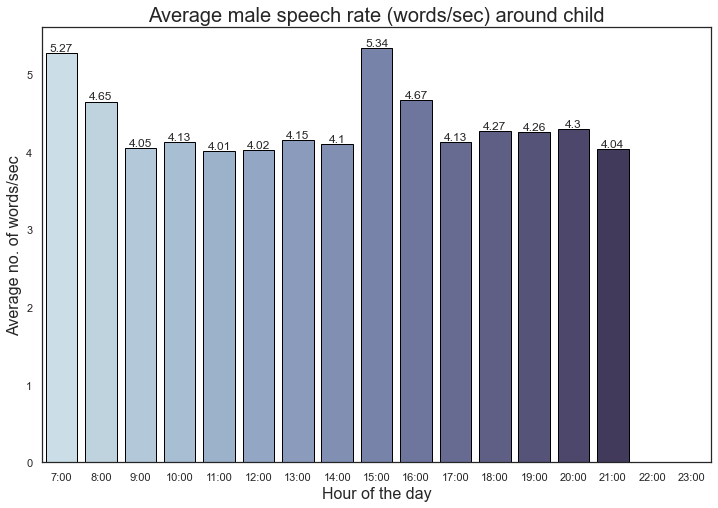

In [77]:
xaxis = ['{}:00'.format(t) for t in buckets]
yaxis = [round(y,2) for y in condensed_df['avg_rate']]
ax = sns.barplot(x = buckets, y = yaxis, palette = "ch:s=.25,rot=-.25",edgecolor='black')
ax.bar_label(ax.containers[0], fontsize=12)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style='white')
plt.xticks(rotation=0)
ax.set_xticklabels(xaxis)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average no. of words/sec', fontsize=16)
plt.title("Average male speech rate (words/sec) around child", fontsize=20)
plt.show()

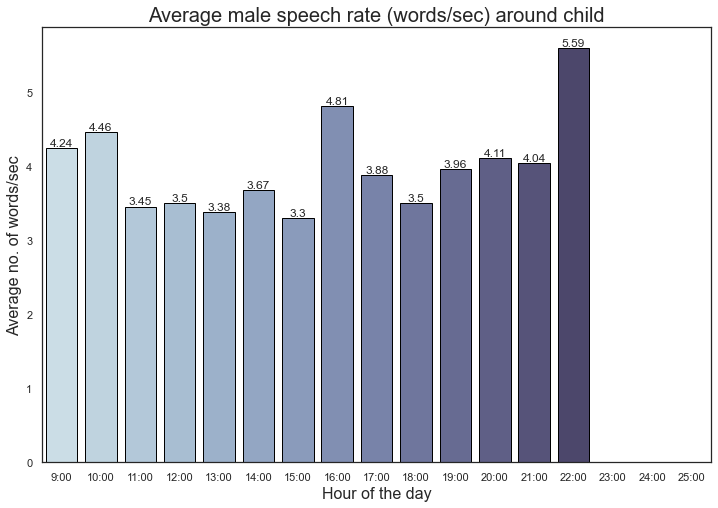

In [83]:
def create_MAN_dayspeed_graph():
    #Preprocessing of data
    childid = '001LTP2'
    filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
    man_timestamps_main = pd.read_csv(filepath_of_csv)
    man_timestamps_main['words_per_sec'] = man_timestamps_main['wordCount']/man_timestamps_main['duration']
    main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
    infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
    itsinfocsv = pd.read_csv(infocsvpath)
    start_datetime_str = str(itsinfocsv['startClockTime'][0])
    end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

    start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
    end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

    og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
    og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

    if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
                actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

    elif (childid.find('R')>=0 or childid.find('J')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
                actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))
    
    start_bucket = actual_time_of_start.hour+1
    if (actual_time_of_start.day < actual_time_of_end.day):
        end_bucket = actual_time_of_end.hour + 25
    else:
        end_bucket = actual_time_of_end.hour+1
    secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
    buckets = [i for i in range (start_bucket, end_bucket+1)]
    no_of_buckets = len(buckets)
    bucket_offsets = [0,secs_until_closest_hour]
    for i in range(1, no_of_buckets):
        bucket_offsets.append(secs_until_closest_hour+3600*(i))

    man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, 
                                labels=buckets, include_lowest=True, right=True)
    condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'duration': 'sum', 'wordCount': 'sum'})
    condensed_df['avg_rate'] = condensed_df['wordCount'] / condensed_df['duration'] 
    condensed_df.fillna(0)
    #Plotting of graph
    xaxis = ['{}:00'.format(t) for t in buckets]
    yaxis = [round(y,2) for y in condensed_df['avg_rate']]
    ax = sns.barplot(x = buckets, y = yaxis, palette = "ch:s=.25,rot=-.25",edgecolor='black')
    ax.bar_label(ax.containers[0], fontsize=12)
    sns.set(rc={'figure.figsize':(12,8)})
    sns.set_theme(style='white')
    plt.xticks(rotation=0)
    ax.set_xticklabels(xaxis)
    plt.xlabel('Hour of the day', fontsize=16)
    plt.ylabel('Average no. of words/sec', fontsize=16)
    plt.title("Average male speech rate (words/sec) around child", fontsize=20)
    plt.show()

create_MAN_dayspeed_graph()

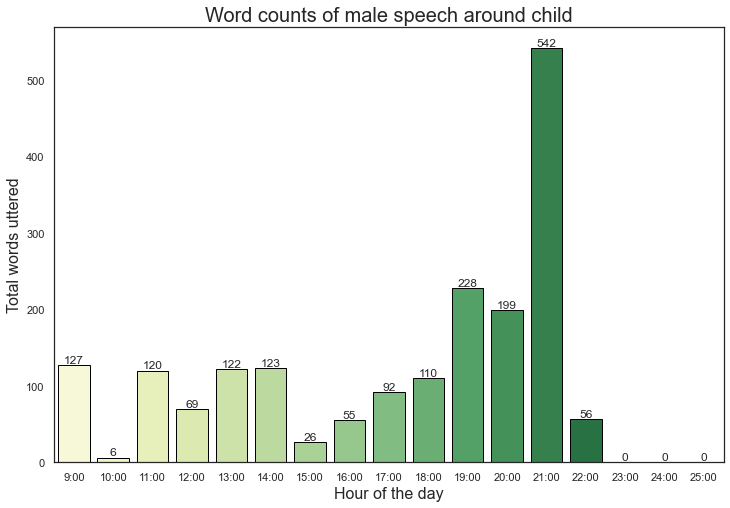

In [10]:
def create_day_words_graph(mf:str):

           
    #Preprocessing of data
    childid = '001LTP2'

    if mf == 'MAN':
        filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
        title = "Word counts of male speech around child"
        palette = 'YlGn'
    else:
        filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_FAN_timestamps.csv")
        title = "Word counts of female speech around child"
        palette = 'Wistia'

    man_timestamps_main = pd.read_csv(filepath_of_csv)
    
    main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
    infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
    itsinfocsv = pd.read_csv(infocsvpath)
    start_datetime_str = str(itsinfocsv['startClockTime'][0])
    end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

    start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
    end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

    og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
    og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

    if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
                actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

    elif (childid.find('R')>=0 or childid.find('J')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
                actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))
    

    start_bucket = actual_time_of_start.hour+1
    if (actual_time_of_start.day < actual_time_of_end.day):
        end_bucket = actual_time_of_end.hour + 25
    else:
        end_bucket = actual_time_of_end.hour+1
    secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
    buckets = [i for i in range (start_bucket, end_bucket+1)]
    no_of_buckets = len(buckets)
    bucket_offsets = [0,secs_until_closest_hour]
    for i in range(1, no_of_buckets):
        bucket_offsets.append(secs_until_closest_hour+3600*(i))
    man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)
    
    condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'wordCount': 'sum'})
    
    condensed_df.fillna(0)
    #Plotting of graph
    xaxis = ['{}:00'.format(t) for t in buckets]
    yaxis = [round(y) for y in condensed_df['wordCount']]
    ax = sns.barplot(x = buckets, y = yaxis, palette = palette,edgecolor='black')
    ax.bar_label(ax.containers[0], fontsize=12)
    sns.set(rc={'figure.figsize':(12,8)})
    sns.set_theme(style='white')
    plt.xticks(rotation=0)
    ax.set_xticklabels(xaxis)
    plt.xlabel('Hour of the day', fontsize=16)
    plt.ylabel('Total words uttered', fontsize=16)
    plt.title(title, fontsize=20)
    plt.show()

create_day_words_graph('MAN')

In [11]:
# Multiple bar plot of above thing

def returnonlyone(mf:str):   
#Preprocessing of data
    childid = '001LTP1'

    if mf == 'MAN':
        filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
        title = "Word counts of male speech around child"
        palette = 'YlGn'
    else:
        filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_FAN_timestamps.csv")
        title = "Word counts of female speech around child"
        palette = 'Wistia'

    man_timestamps_main = pd.read_csv(filepath_of_csv)

    main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
    infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
    itsinfocsv = pd.read_csv(infocsvpath)
    start_datetime_str = str(itsinfocsv['startClockTime'][0])
    end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

    start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
    end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

    og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
    og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

    if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
                actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

    elif (childid.find('R')>=0 or childid.find('J')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
                actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))

    start_bucket = actual_time_of_start.hour+1
    if (actual_time_of_start.day < actual_time_of_end.day):
        end_bucket = actual_time_of_end.hour + 25
    else:
        end_bucket = actual_time_of_end.hour+1
    secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
    buckets = [i for i in range (start_bucket, end_bucket+1)]
    no_of_buckets = len(buckets)
    bucket_offsets = [0,secs_until_closest_hour]
    for i in range(1, no_of_buckets):
        bucket_offsets.append(secs_until_closest_hour+3600*(i))
    man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)

    condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'wordCount': 'sum'})
    condensed_df.fillna(0)
    return condensed_df





In [12]:
onlyman = returnonlyone('MAN')
onlywoman = returnonlyone('FAN')
result = pd.concat([onlyman, onlywoman], axis=1)
result.columns = ['MAN','FAN']
result = result.reset_index()

In [13]:
melteddf = pd.melt(result, id_vars='before_hour_of_day', var_name="speaker", value_name="word_counts")

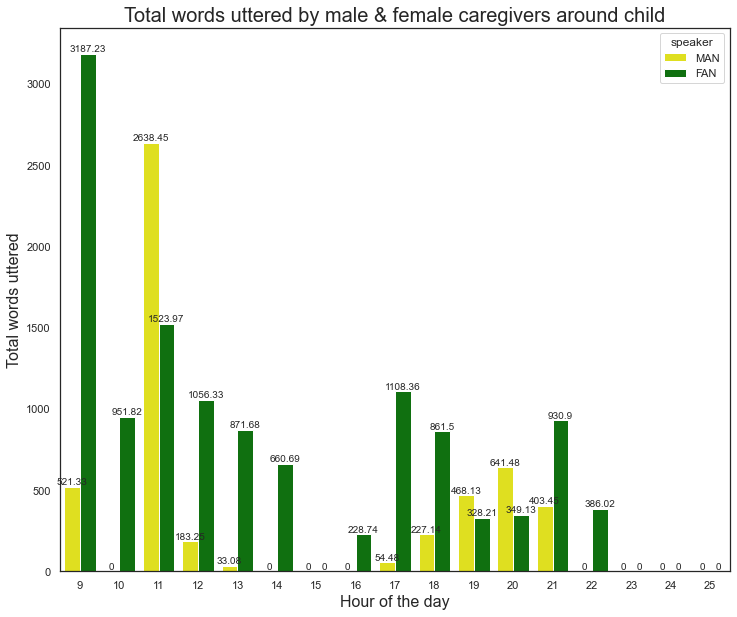

In [15]:
#Plotting of graph
 
#ax = sns.barplot(x = buckets, y = yaxis, palette = palette,edgecolor='black')
ax = sns.barplot(x='before_hour_of_day', y='word_counts', hue='speaker',palette=["yellow", "green"],data=melteddf)
#xaxis = ['{}:00'.format(t) for t in melteddf['before_hour_of_day']]
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
sns.set(rc={'figure.figsize':(12,10)})
sns.set_theme(style='white')
plt.xticks(rotation=0)
#ax.set_xticklabels(xaxis)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Total words uttered', fontsize=16)
plt.title('Total words uttered by male & female caregivers around child', fontsize=20)
plt.show()

In [16]:
list((onlyman.index.values))

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

Experimenting with decibel values

/var/folders/jt/dpcpyp4n5mggjjbh2lylsglh0000gn/T/ipykernel_33230/330132014.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xaxis)


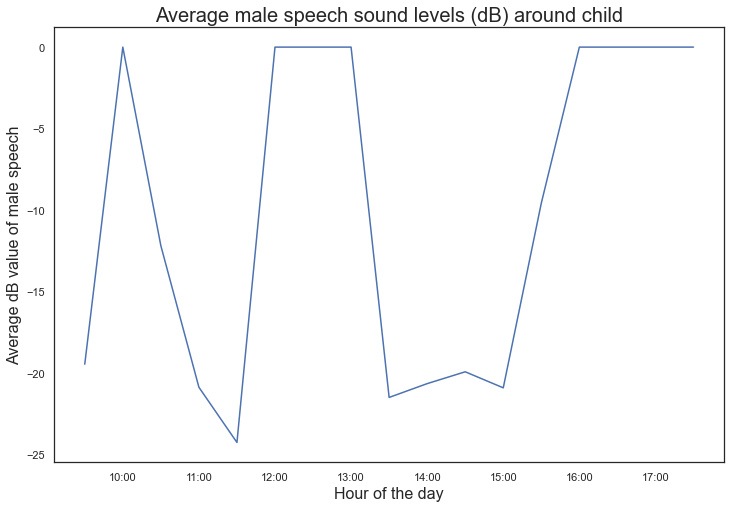

In [15]:
#Preprocessing of data
childid = '001LTP1'
filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
man_timestamps_main = pd.read_csv(filepath_of_csv)
 
main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
itsinfocsv = pd.read_csv(infocsvpath)
start_datetime_str = str(itsinfocsv['startClockTime'][0])
end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
        actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
        actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

elif (childid.find('R')>=0 or childid.find('J')>=0):
        actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
        actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))

start_bucket = actual_time_of_start.hour+1
if (actual_time_of_start.day < actual_time_of_end.day):
        end_bucket = actual_time_of_end.hour + 25
else:
        end_bucket = actual_time_of_end.hour+1
secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
buckets = [i for i in range (start_bucket, end_bucket+1)]
no_of_buckets = len(buckets)
bucket_offsets = [0,secs_until_closest_hour]
for i in range(1, no_of_buckets):
        bucket_offsets.append(secs_until_closest_hour+3600*(i))

man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)
condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'duration': 'sum', 'avg_dB': 'sum'})
condensed_df['avg_decibel_value'] = condensed_df['avg_dB'] / condensed_df['duration'] 
condensed_df = condensed_df.fillna(0)
#Plotting of graph
xaxis = ['{}:00'.format(t) for t in buckets]
yaxis = [round(y,2) for y in condensed_df['avg_decibel_value']]
#ax = sns.barplot(x = buckets, y = yaxis, palette = "ch:s=.25,rot=-.25",edgecolor='black')
ax = sns.lineplot(data=condensed_df, x='before_hour_of_day', y='avg_decibel_value')
#ax.bar_label(ax.containers[0], fontsize=12)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style='white')
plt.xticks(rotation=0 )
ax.set_xticklabels(xaxis)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average dB value of male speech', fontsize=16)
plt.title("Average male speech sound levels (dB) around child", fontsize=20)
plt.show()

In [63]:
xaxisdivisions[~pd.isnull(xaxisdivisions)]

before_hour_of_day
9      82.0
11    394.0
12    428.0
13    435.0
17    445.0
18    489.0
19    577.0
20    682.0
21    721.0
Name: seg_id, dtype: float64

In [17]:
#rough
values_drawn

before_hour_of_day
9      82.0
11    394.0
12    428.0
13    435.0
17    445.0
18    489.0
19    577.0
20    682.0
21    721.0
Name: seg_id, dtype: float64

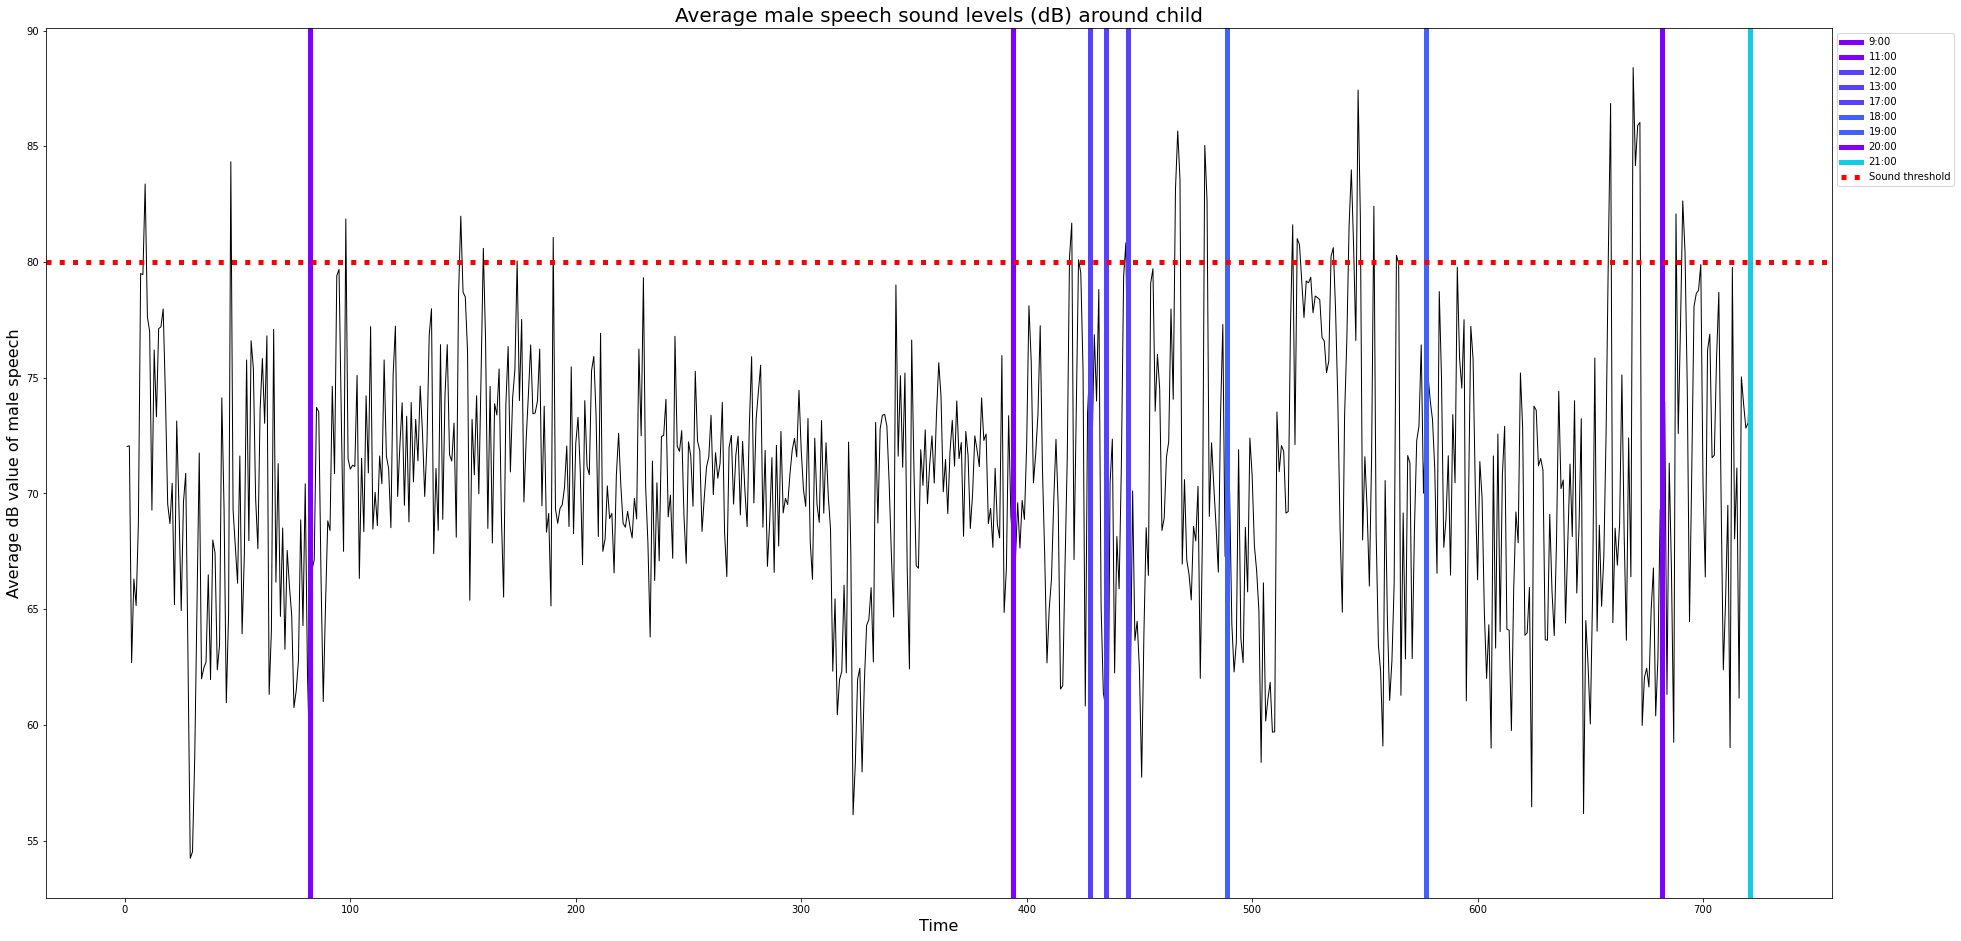

In [23]:
childid = '001LTP1'
filepath_of_csv = os.path.join("/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles" , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
man_timestamps_main = pd.read_csv(filepath_of_csv)

x1 = man_timestamps_main['seg_id']
y1 = man_timestamps_main['avg_dB']+97
plt.figure(figsize=(32,16))
plt.plot(x1, y1, color = 'black', lw = 1)
ax = plt.gca()
xaxisdivisions, df = get_hourly_buckets()
times_drawn = xaxisdivisions.loc[~pd.isnull(xaxisdivisions)].index
values_drawn = xaxisdivisions[~pd.isnull(xaxisdivisions)] 
color = plt.cm.rainbow(np.linspace(0, 1, 25))
random.shuffle(color)
i = 0
for value in values_drawn:
    plt.axvline(x=value, color = color[i], label= str(times_drawn[i])+":00", lw=5)
    i+=1 
    
plt.axhline(y=80, color = 'red', label= "Sound threshold", lw=5, linestyle = ':')      
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Average dB value of male speech', fontsize=16)
plt.title("Average male speech sound levels (dB) around child", fontsize=20)

plt.show()

In [13]:
def get_hourly_buckets():
        main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
        infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
        itsinfocsv = pd.read_csv(infocsvpath)
        start_datetime_str = str(itsinfocsv['startClockTime'][0])
        end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

        start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
        end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

        og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
        og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

        if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
                actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

        elif (childid.find('R')>=0 or childid.find('J')>=0):
                actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
                actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))

        start_bucket = actual_time_of_start.hour+1
        if (actual_time_of_start.day < actual_time_of_end.day):
                end_bucket = actual_time_of_end.hour + 25
        else:
                end_bucket = actual_time_of_end.hour+1
        secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
        buckets = [i for i in range (start_bucket, end_bucket+1)]
        secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
        buckets = [i for i in range (start_bucket, end_bucket+1)]
        no_of_buckets = len(buckets)
        bucket_offsets = [0,secs_until_closest_hour]
        for i in range(1, no_of_buckets):
                bucket_offsets.append(secs_until_closest_hour+3600*(i))  
        
        
        man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)
        condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'seg_id': 'max'})
        return condensed_df['seg_id'] , man_timestamps_main

In [8]:
def hourly_divisions():
        secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
        buckets = [i for i in range (start_bucket, end_bucket+1)]
        no_of_buckets = len(buckets)
        bucket_offsets = [0,secs_until_closest_hour]
        for i in range(1, no_of_buckets):
                bucket_offsets.append(secs_until_closest_hour+3600*(i))  
        
        xaxisdivisions = []
        man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)
        condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'seg_id': 'max'})
        return (condensed_df['seg_id'])
hourly_divisions()

NameError: name 'actual_time_of_start' is not defined

## SNR calculations
In this section, we calculate SNR using the following formula:

signal = avg dB in FAN and MAN

signal + noise = avg dB in OLN 

SNR = signal / ((signal + noise) -signal)

Fixed version of sound levels (man or fan) around child

C:\Users\linguist\AppData\Local\Temp\ipykernel_14324\3714526411.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'duration': 'sum', 'avg_dB': 'sum'})


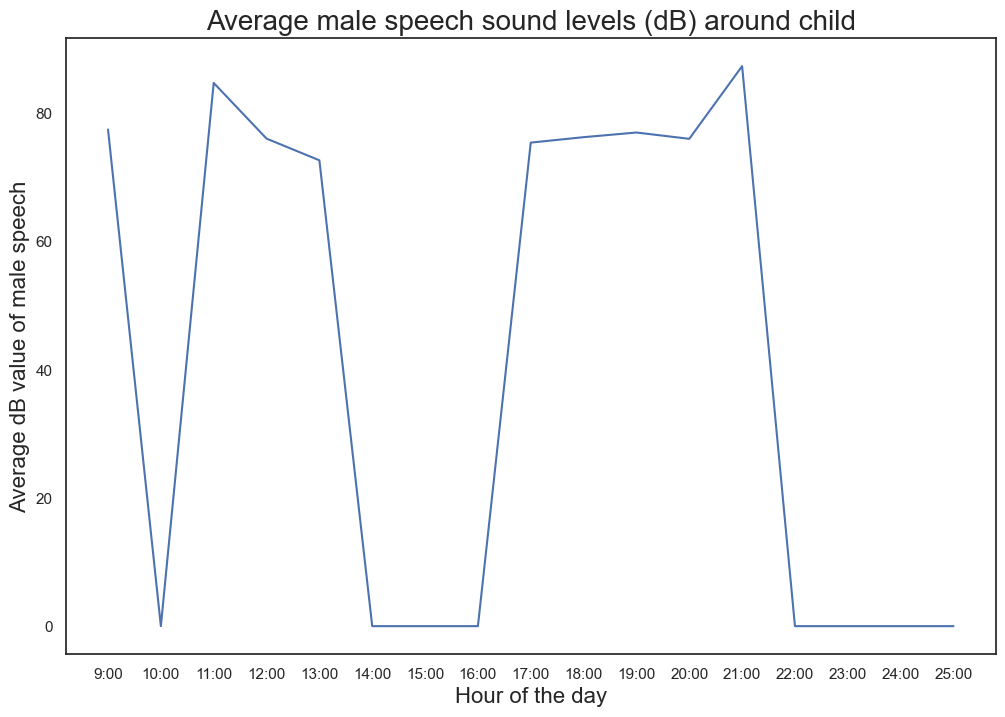

In [30]:
main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"

#Preprocessing of data
childid = '001LTP1'
filepath_of_csv = os.path.join(main_input_folder, childid+ "_speech_output", childid+"_MAN_timestamps.csv")
man_timestamps_main = pd.read_csv(filepath_of_csv)
 
infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
itsinfocsv = pd.read_csv(infocsvpath)
start_datetime_str = str(itsinfocsv['startClockTime'][0])
end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
        actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
        actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

elif (childid.find('R')>=0 or childid.find('J')>=0):
        actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
        actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))

start_bucket = actual_time_of_start.hour+1
if (actual_time_of_start.day < actual_time_of_end.day):
        end_bucket = actual_time_of_end.hour + 25
else:
        end_bucket = actual_time_of_end.hour+1
secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
buckets = [i for i in range (start_bucket, end_bucket+1)]
no_of_buckets = len(buckets)
bucket_offsets = [0,secs_until_closest_hour]
for i in range(1, no_of_buckets):
        bucket_offsets.append(secs_until_closest_hour+3600*(i))

man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)
condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'duration': 'sum', 'avg_dB': 'sum'})
condensed_df['avg_decibel_value'] = (condensed_df['avg_dB'] / condensed_df['duration'] ) 
condensed_df = condensed_df.fillna(0)
condensed_df['avg_decibel_value'] =[i+97  if i!=0 else 0 for i in condensed_df['avg_decibel_value'] ]

#Plotting of graph
xaxis = ['{}:00'.format(t) for t in buckets]
yaxis = [round(y ,2) for y in condensed_df['avg_decibel_value'] ]

ax = sns.lineplot(data=condensed_df, x='before_hour_of_day', y='avg_decibel_value')
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style='white')

plt.xticks(list(condensed_df.index), labels=xaxis)
#ax.set_xticklabels(ticks = condensed_df.index ,labels = xaxis) 
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average dB value of male speech', fontsize=16)
plt.title("Average male speech sound levels (dB) around child", fontsize=20)
plt.show()

The below function returns a df of hourly average decibel levels for MAN, FAN and OLN

In [25]:
main_input_folder = "/Users/arjun/Box/box-group-lena-studies/Soundscape/wavFiles"
def returnonlydB(mf:str):   
 
    childid = '001LTP1'

    if mf == 'MAN':
        filepath_of_csv = os.path.join(main_input_folder , childid+ "_speech_output", childid+"_MAN_timestamps.csv")
        
    elif mf=='FAN':
        filepath_of_csv = os.path.join(main_input_folder, childid+ "_speech_output", childid+"_FAN_timestamps.csv")
    else:
        filepath_of_csv = os.path.join(main_input_folder, childid+ "_speech_output", childid+"_OLN_timestamps.csv")
      
    
    man_timestamps_main = pd.read_csv(filepath_of_csv)

    infocsvpath = os.path.join(main_input_folder , childid + "_speech_output",   childid+"_its_info.csv")  
    itsinfocsv = pd.read_csv(infocsvpath)
    start_datetime_str = str(itsinfocsv['startClockTime'][0])
    end_datetime_str = str(itsinfocsv['endClockTime'][0]) 

    start_datetime_object = datetime.datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%SZ')
    end_datetime_object = datetime.datetime.strptime(end_datetime_str, '%Y-%m-%dT%H:%M:%SZ')

    og_start_time = start_datetime_object.replace(tzinfo=datetime.timezone.utc)
    og_end_time  = end_datetime_object.replace(tzinfo=datetime.timezone.utc)

    if (childid.find('L')>=0 or childid.find('M')>=0  or  childid.find('D')>=0  or childid.find('E')>=0):
            actual_time_of_start = og_start_time.astimezone(timezone('America/Chicago'))
            actual_time_of_end =  og_end_time.astimezone(timezone('America/Chicago'))

    elif (childid.find('R')>=0 or childid.find('J')>=0):
            actual_time_of_start = og_start_time.astimezone(timezone('America/New_York'))
            actual_time_of_end = og_end_time.astimezone(timezone('America/New_York'))

    start_bucket = actual_time_of_start.hour+1
    if (actual_time_of_start.day < actual_time_of_end.day):
            end_bucket = actual_time_of_end.hour + 25
    else:
            end_bucket = actual_time_of_end.hour+1
    secs_until_closest_hour = 3600 - actual_time_of_start.minute*60 - actual_time_of_start.second
    buckets = [i for i in range (start_bucket, end_bucket+1)]
    no_of_buckets = len(buckets)
    bucket_offsets = [0,secs_until_closest_hour]
    for i in range(1, no_of_buckets):
            bucket_offsets.append(secs_until_closest_hour+3600*(i))

    man_timestamps_main['before_hour_of_day'] = pd.cut(man_timestamps_main['clip_offset'], bins=bucket_offsets, labels=buckets, include_lowest=True, right=True)
    condensed_df = man_timestamps_main.groupby('before_hour_of_day').agg({'duration': 'sum', 'avg_dB': 'sum'})
    condensed_df['avg_decibel_value'] = (condensed_df['avg_dB'] / condensed_df['duration'] ) 
    condensed_df = condensed_df.fillna(0)
    shifted = []
    for i in range (0, len(condensed_df)):
        if condensed_df['avg_decibel_value'][i]!=0 or condensed_df['duration'][i]!=0:
              shifted.append(condensed_df['avg_decibel_value'][i]+97)
        else:
              shifted.append(0)

    condensed_df['avg_decibel_value'] =shifted
    return condensed_df

In [5]:
bucketed_OLN_decibels = returnonlydB("OLN")
bucketed_MAN_decibels = returnonlydB("MAN")
bucketed_FAN_decibels = returnonlydB("FAN")

In [6]:
bucketed_master_decibels = bucketed_OLN_decibels.join(bucketed_FAN_decibels, how = 'outer', lsuffix = '_OLN', rsuffix = '_FAN').join(bucketed_MAN_decibels, how = 'outer', rsuffix = '_MAN')

In [7]:
bucketed_master_decibels['signal'] = (bucketed_master_decibels['avg_decibel_value']+bucketed_master_decibels['avg_decibel_value_FAN'])/2
bucketed_master_decibels['signal+noise-signal'] = bucketed_master_decibels['avg_decibel_value_OLN'] - bucketed_master_decibels['signal']
bucketed_master_decibels['SNR'] =  bucketed_master_decibels['signal']/bucketed_master_decibels['signal+noise-signal']

In [8]:
snrlist=[]
for i in range(0,len(bucketed_master_decibels)):
    if bucketed_master_decibels['signal'][i] == 0:
        snrlist.append(0)
    elif bucketed_master_decibels['signal+noise-signal'][i] == 0:
        snrlist.append(bucketed_master_decibels['signal'][i]/0.001)
    else:
        snrlist.append(bucketed_master_decibels['signal'][i]/bucketed_master_decibels['signal+noise-signal'][i])
bucketed_master_decibels['SNR'] = snrlist

In [9]:
bucketed_master_decibels

,duration_OLN,avg_dB_OLN,avg_decibel_value_OLN,duration_FAN,avg_dB_FAN,avg_decibel_value_FAN,duration,avg_dB,avg_decibel_value,signal,signal+noise-signal,SNR
before_hour_of_day,,,,,,,,,,,,
9,165.41,-3404.54,76.417568,724.22,-8569.31,85.167532,119.29,-2323.14,77.525275,81.346403,-4.928835,-16.504185
10,410.97,-6861.77,80.303477,207.23,-4197.06,76.746851,0.00,0.00,0.000000,38.373426,41.930051,0.915177
11,627.12,-9241.19,82.264080,354.95,-5871.22,80.459022,666.56,-8130.83,84.801803,82.630413,-0.366333,-225.561176
12,609.99,-10215.29,80.253348,245.50,-4157.57,80.064888,42.29,-883.51,76.108300,78.086594,2.166755,36.038505
13,340.13,-5925.05,79.580043,207.94,-3549.23,79.931471,7.83,-190.13,72.717752,76.324611,3.255431,23.445313
14,346.97,-4076.19,85.252039,140.35,-2789.11,77.127467,0.00,0.00,0.000000,38.563734,46.688306,0.825983
15,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
16,9.18,-172.48,78.211329,52.33,-1093.10,76.111408,0.00,0.00,0.000000,38.055704,40.155625,0.947705
17,223.43,-4303.53,77.738800,239.83,-4963.22,76.305258,12.50,-268.96,75.483200,75.894229,1.844571,41.144658


Plotting data

<AxesSubplot:xlabel='before_hour_of_day', ylabel='SNR'>

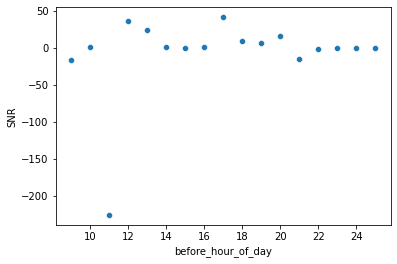

In [10]:
sns.scatterplot(data=bucketed_master_decibels, x="before_hour_of_day", y="SNR")

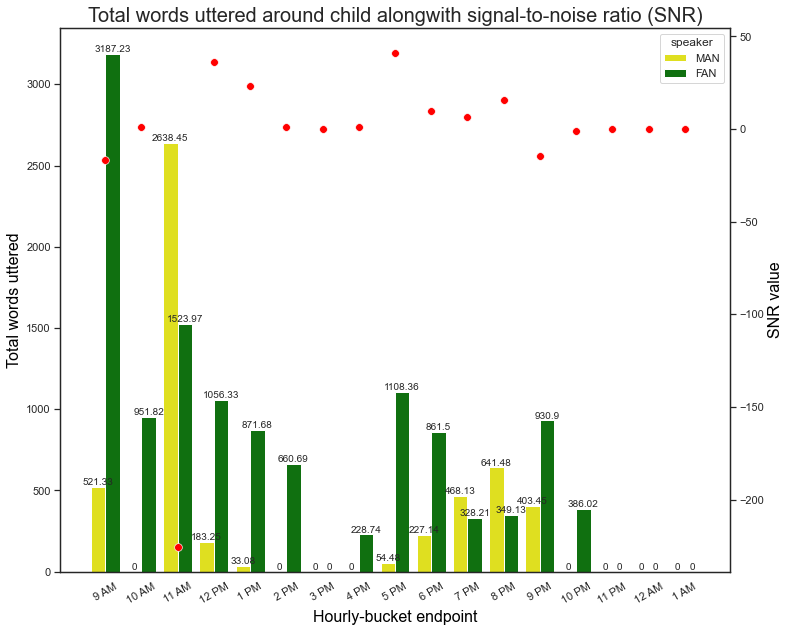

In [104]:
xaxis = ['{}:00'.format(t) for t in bucketed_master_decibels.index ]

def transform24to12(xaxis):
    xaxis12h = []
    for i in xaxis:
        if (i.find(":")==2):
            if int(i[0:2])>=24:
                i = "0"+str(int(i[0:2])-24)+":00"
        d = datetime.datetime.strptime(i, "%H:%M")
        xaxis12h.append(d.strftime("%-I %p"))
    return xaxis12h

xaxis12h = transform24to12(xaxis)
fig, ax = plt.subplots()
plt.title('Total words uttered around child alongwith signal-to-noise ratio (SNR)',fontsize=20)
plt.xticks(rotation=30)
sns.barplot(x='before_hour_of_day', y='word_counts', hue='speaker',palette=["yellow", "green"],data=melteddf,ax = ax)
#.set(title= 'Total words uttered around child alongwith signal-to-noise ratio (SNR)')
ax2 = ax.twinx()
sns.scatterplot(data=bucketed_master_decibels, x=range(0,len(bucketed_master_decibels)), y="SNR", ax=ax2,color = 'red', s = 60)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_xticklabels(xaxis12h)
ax.set_xlabel('Hourly-bucket endpoint', color = 'black', fontsize = 16)
ax.set_ylabel('Total words uttered', color = 'black', fontsize=16)
ax2.set_ylabel('SNR value', color = 'black', fontsize=16)
sns.set(rc={'figure.figsize':(12,10)})
 
plt.show()
sns.set_theme(style='white')
 

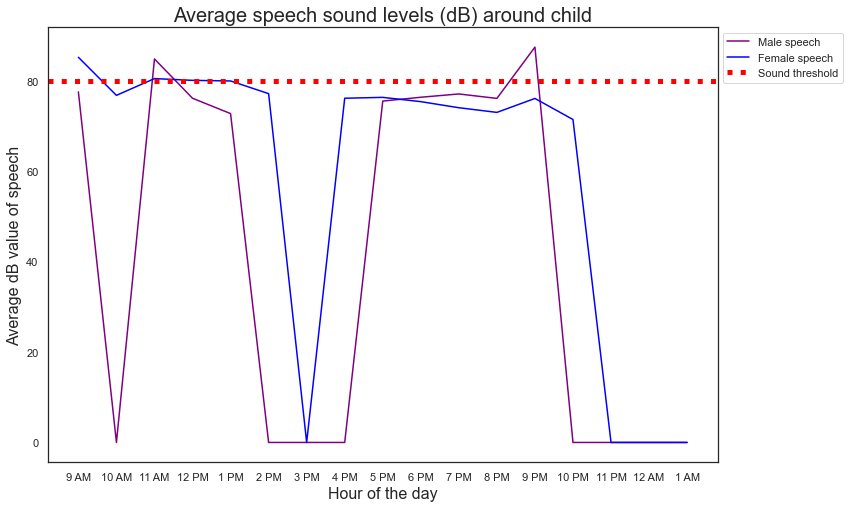

In [36]:
#Plotting of graph
condensed_df = returnonlydB("MAN")
condensed_df2 = returnonlydB("FAN")
xaxis = ['{}:00'.format(t) for t in condensed_df.index ]
yaxis = [round(y ,2) for y in condensed_df['avg_decibel_value'] ]
def transform24to12(xaxis):
    xaxis12h = []
    for i in xaxis:
        if (i.find(":")==2):
            if int(i[0:2])>=24:
                i = "0"+str(int(i[0:2])-24)+":00"
        d = datetime.datetime.strptime(i, "%H:%M")
        xaxis12h.append(d.strftime("%-I %p"))
    return xaxis12h

xaxis12h = transform24to12(xaxis)
ax = sns.lineplot(data=condensed_df, x='before_hour_of_day', y='avg_decibel_value', label = "Male speech", color = "purple")
ax1 = sns.lineplot(data=condensed_df2, x='before_hour_of_day', y='avg_decibel_value', label = "Female speech", color = "blue")
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style='white')
plt.axhline(y=80, color = 'red', label= "Sound threshold", lw=5, linestyle = ':')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xticks(list(condensed_df.index), labels=xaxis12h)
#ax.set_xticklabels(ticks = condensed_df.index ,labels = xaxis) 
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Average dB value of speech', fontsize=16)
plt.title("Average speech sound levels (dB) around child", fontsize=20)

plt.show()